In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd

In [3]:
bdd = pd.read_csv("/neurospin/dico/jchavas/Runs/61_classifier_regresser/Output/flanker/summary/bdd_2023-09-20_STs.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)

In [4]:
len(bdd)

45

AUC = 0.5162481962481962 +/- 0.04068683245316622
AUC-1 = 0.5296969696969697 +/- 0.0329667251925613
AUC-2 = 0.5162481962481962 +/- 0.04068683245316622
AUC (best model) = 0.5155555555555555 +/- 0.041120908070463015


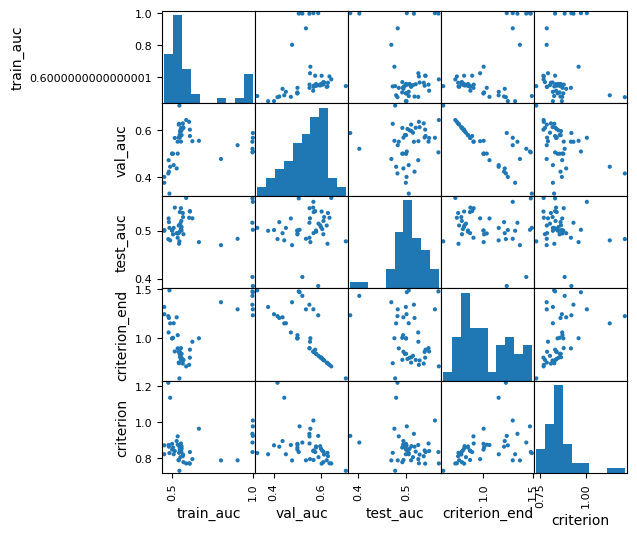

In [5]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end_old"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["criterion_end"] = bdd.apply(lambda x: 2*(1-x["val_auc"]) + max(-x["val_auc"] + x["train_auc"], 0), axis=1)
best_end = bdd.sort_values(by=['criterion_end'], ascending=True)[:5]
best_end_old = bdd.sort_values(by=['criterion_end_old'], ascending=True)[:5]
best_val_end = bdd.sort_values(by=['val_auc'], ascending=False)[:5]
best_best = bdd.sort_values(by=['criterion'], ascending=True)[:5]
print(f"AUC = {best_end['test_auc'].mean()} +/- {best_end['test_auc'].std()}")
print(f"AUC-1 = {best_end_old['test_auc'].mean()} +/- {best_end_old['test_auc'].std()}")
print(f"AUC-2 = {best_val_end['test_auc'].mean()} +/- {best_val_end['test_auc'].std()}")
print(f"AUC (best model) = {best_best['best_test_auc'].mean()} +/- {best_best['best_test_auc'].std()}")
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'criterion_end', 'criterion']],
                                 figsize=(6,6),
                                 alpha=1.0)

In [6]:
best_end = bdd.sort_values(by=['criterion_end'], ascending=True)[:5]
best_val_end = bdd.sort_values(by=['val_auc'], ascending=False)[:5]
best_best = bdd.sort_values(by=['criterion'], ascending=True)[:5]
print(f"AUC = {best_end['test_auc'].mean()} +/- {best_end['test_auc'].std()}")
print(f"AUC-2 = {best_val_end['test_auc'].mean()} +/- {best_val_end['test_auc'].std()}")
print(f"AUC (best model) = {best_best['best_test_auc'].mean()} +/- {best_best['best_test_auc'].std()}")

AUC = 0.5162481962481962 +/- 0.04068683245316622
AUC-2 = 0.5162481962481962 +/- 0.04068683245316622
AUC (best model) = 0.5155555555555555 +/- 0.041120908070463015


Text(0, 0.5, 'best_test_auc')

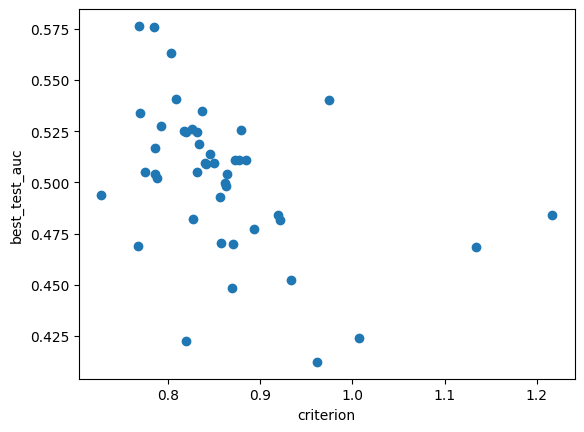

In [7]:
plt.scatter(bdd["criterion"], bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

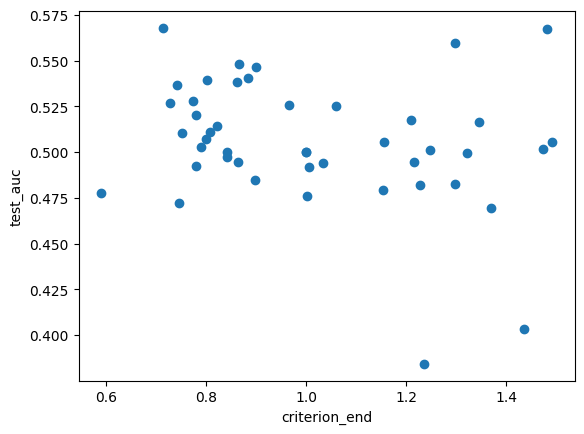

In [8]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

Text(0, 0.5, 'test_auc')

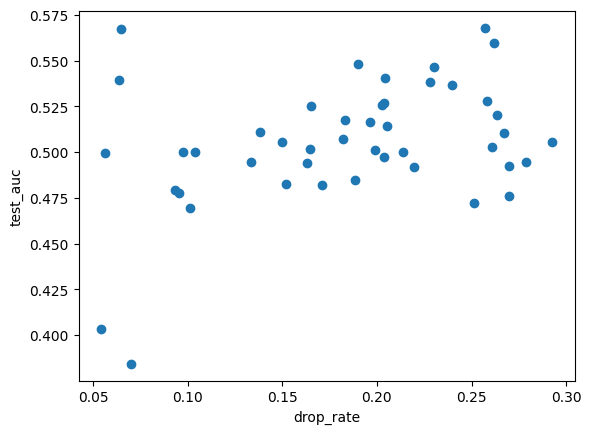

In [9]:
plt.scatter(bdd.drop_rate, bdd.test_auc)
plt.xlabel("drop_rate")
# plt.xscale("log")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

Text(0, 0.5, 'test_auc')

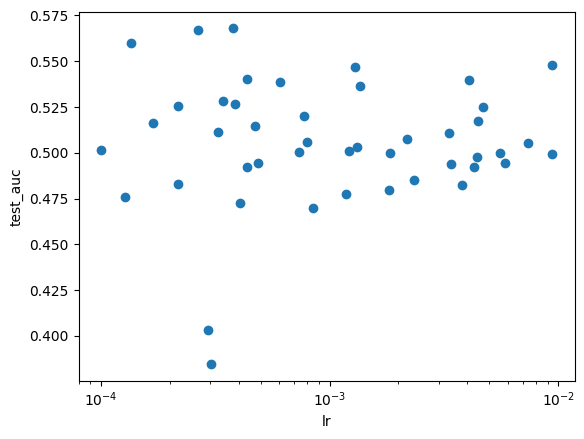

In [10]:
plt.scatter(bdd.lr, bdd.test_auc)
plt.xlabel("lr")
plt.xscale("log")
plt.ylabel("test_auc")
# plt.xlim((0.75,0.85))

(0.75, 0.85)

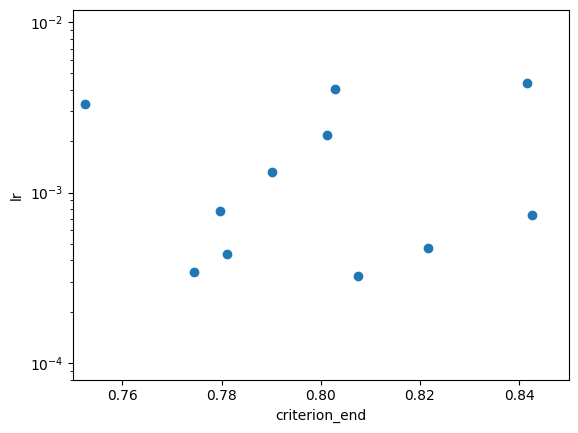

In [11]:
plt.scatter(bdd["criterion_end"], bdd.lr)
plt.xlabel("criterion_end")
plt.ylabel("lr")
plt.yscale("log")
plt.xlim((0.75,0.85))

(0.75, 0.85)

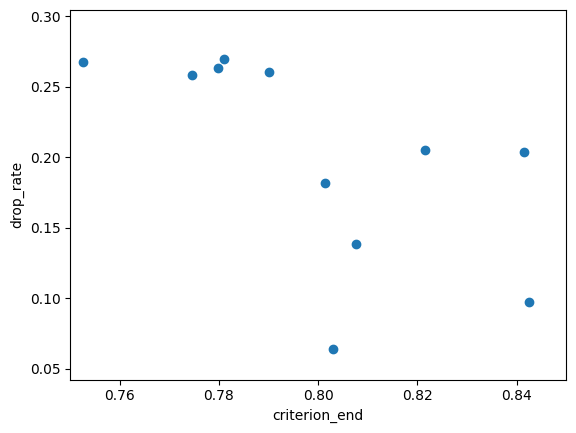

In [12]:
plt.scatter(bdd["criterion_end"], bdd.drop_rate)
plt.xlabel("criterion_end")
plt.ylabel("drop_rate")
# plt.yscale("log")
plt.xlim((0.75,0.85))

In [13]:
quantile = []
test_auc = []
test_auc_cum = []
error_cum = []
error = []
delta=0.1
quantile_x = np.arange(delta,1+delta,delta)
print(quantile_x)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())
    error_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].sem())
    if q==delta:
        test_auc.append(test_auc_cum[-1])
        error.append(error_cum[-1])
    else:
        test_auc.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].mean())
        error.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].sem())

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [14]:
test_auc

[0.5162481962481962,
 0.5127705627705628,
 0.5151226551226551,
 0.5077200577200578,
 0.53001443001443,
 0.4987012987012987,
 0.501046176046176,
 0.4759595959595959,
 0.5146464646464646,
 0.4853535353535353]

In [15]:
error

[0.018195704630884837,
 0.007698449889081704,
 0.006427498400235506,
 0.010330234240803675,
 0.01509265003009552,
 0.008023788730600202,
 0.009660815631366157,
 0.023586104676133177,
 0.016555520192151136,
 0.03409422376112302]

Text(0, 0.5, 'test_auc')

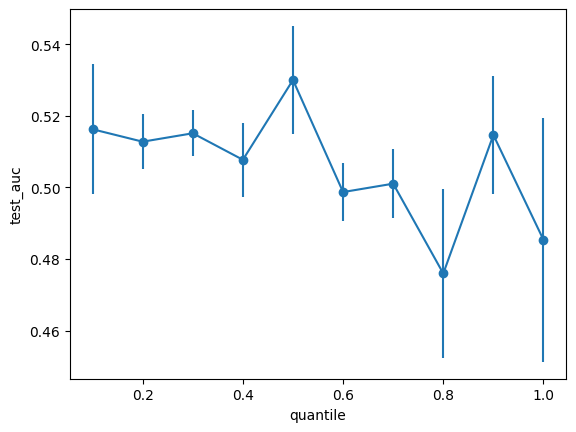

In [16]:
plt.errorbar(quantile_x, test_auc, error, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc")
# plt.ylim((0.45,0.6))

(0.45, 0.6)

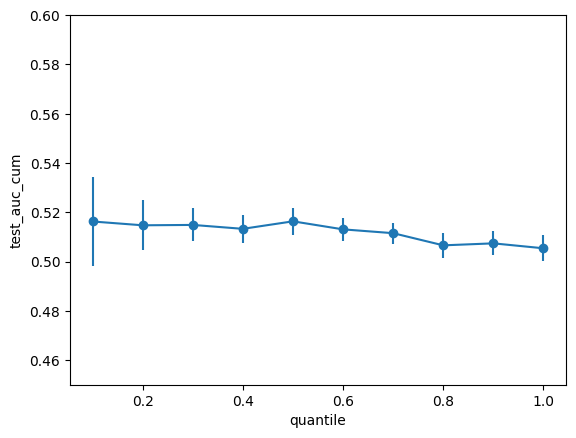

In [17]:
plt.errorbar(quantile_x, test_auc_cum, error_cum, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc_cum")
plt.ylim((0.45,0.6))

Text(0, 0.5, 'test_auc')

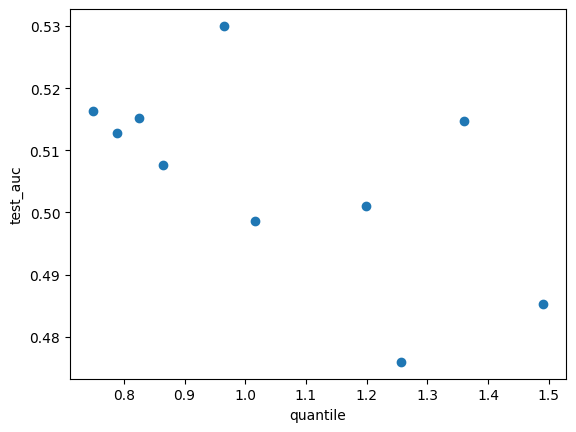

In [18]:
plt.scatter(quantile, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

In [19]:
best_quantile = []
best_test_auc = []
for q in quantile_x:
    one_quantile = bdd['criterion'].quantile(q=q)
    best_quantile.append(one_quantile)
    best_test_auc.append(bdd[bdd['criterion'] < one_quantile]['best_test_auc'].mean())

Text(0, 0.5, 'best_test_auc')

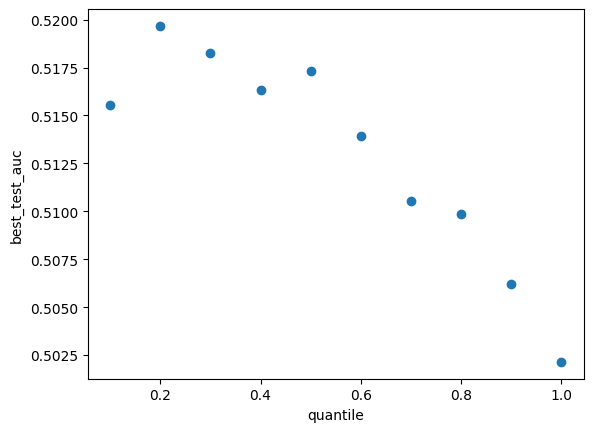

In [20]:
plt.scatter(quantile_x, best_test_auc)
plt.xlabel("quantile")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

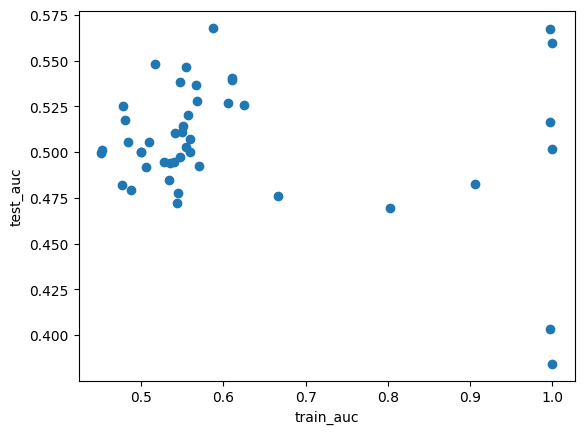

In [21]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

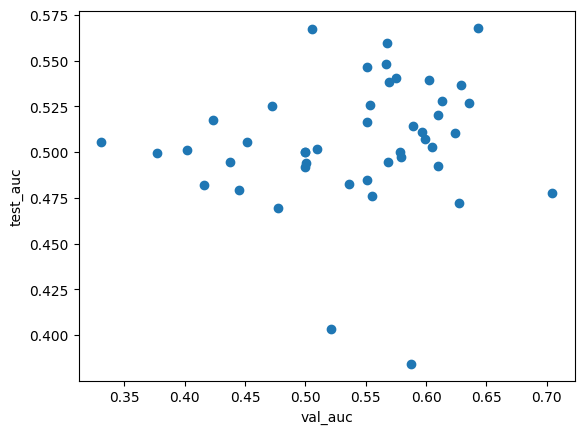

In [22]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'criterion')

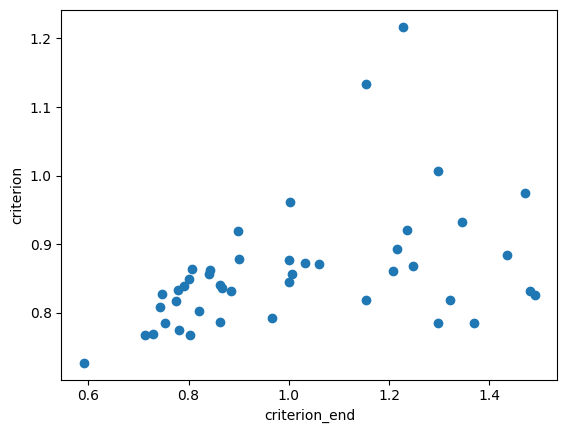

In [23]:
plt.scatter(bdd.criterion_end, bdd.criterion)
plt.xlabel("criterion_end")
plt.ylabel("criterion")

/tmp/ipykernel_3397375/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


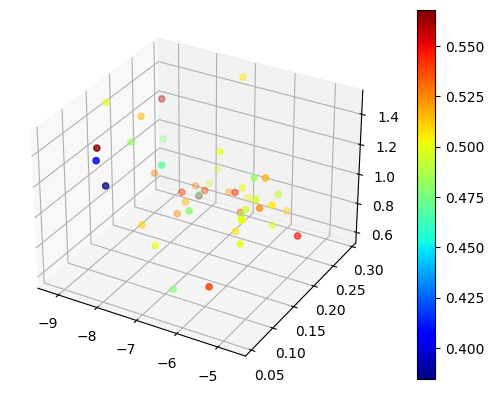

In [24]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_3397375/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


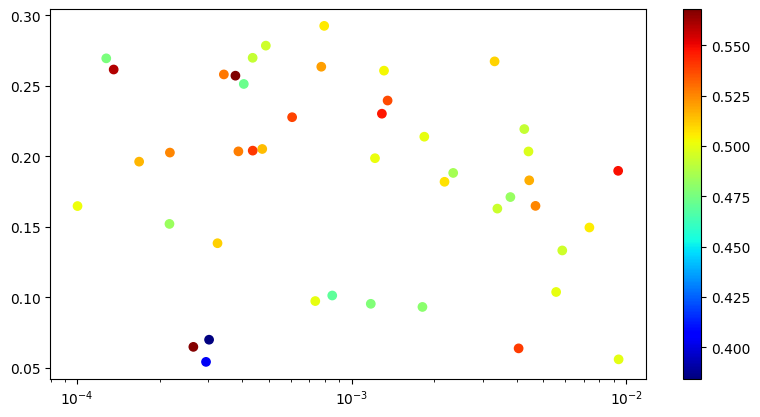

In [25]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_3397375/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


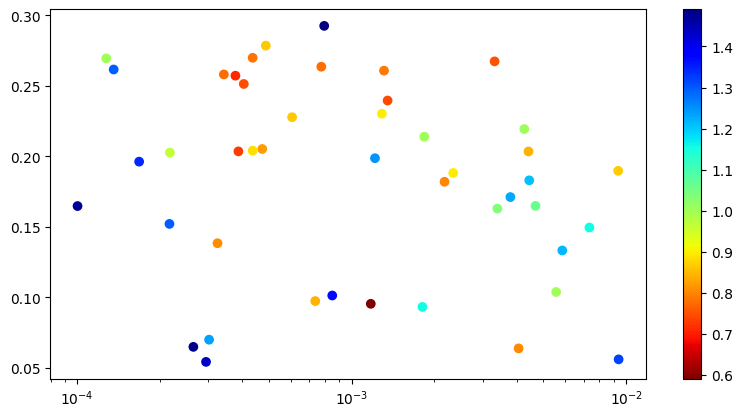

In [26]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'val_auc')

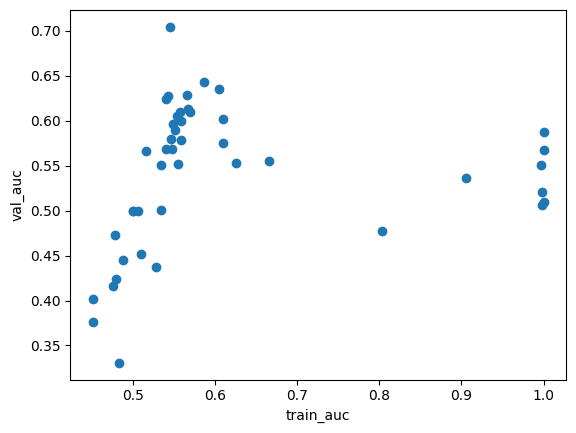

In [27]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

In [28]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end_old,criterion_end
16,/neurospin/dico/jchavas/Runs/61_classifier_reg...,0.545160,0.704419,0.477489,0.547504,0.725205,0.493795,0.095481,0.994771,0.001174,138.639008,0.727292,0.750421,0.591162
42,/neurospin/dico/jchavas/Runs/61_classifier_reg...,0.587083,0.643044,0.567965,0.583936,0.648118,0.576335,0.257244,0.897633,0.000377,138.630600,0.767947,0.769873,0.713912
6,/neurospin/dico/jchavas/Runs/61_classifier_reg...,0.605434,0.635352,0.526696,0.590027,0.640917,0.533622,0.203574,0.730291,0.000387,138.619446,0.769056,0.759214,0.729296
29,/neurospin/dico/jchavas/Runs/61_classifier_reg...,0.566080,0.628805,0.536652,0.567921,0.623732,0.540693,0.239626,0.744972,0.001352,138.627075,0.808348,0.805115,0.742390
30,/neurospin/dico/jchavas/Runs/61_classifier_reg...,0.543192,0.627005,0.472439,0.535410,0.637480,0.482251,0.251365,0.997236,0.000405,138.626663,0.827110,0.829803,0.745990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,/neurospin/dico/jchavas/Runs/61_classifier_reg...,0.802683,0.477578,0.469553,0.587301,0.627823,0.576046,0.101374,0.838090,0.000850,128.028412,0.784876,1.369950,1.369950
32,/neurospin/dico/jchavas/Runs/61_classifier_reg...,0.997664,0.520949,0.403175,0.639237,0.584943,0.510823,0.054308,0.848724,0.000295,95.031906,0.884408,1.434816,1.434816
12,/neurospin/dico/jchavas/Runs/61_classifier_reg...,1.000000,0.509329,0.501587,0.678034,0.567921,0.540260,0.164799,0.918124,0.000100,103.540260,0.974270,1.472013,1.472013
33,/neurospin/dico/jchavas/Runs/61_classifier_reg...,0.997822,0.505728,0.567100,0.600957,0.589853,0.505051,0.064952,0.919244,0.000265,87.311127,0.831399,1.480637,1.480637
